# Machine Learning Models

## Import the necessary libraries and tools

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('cleaned_animationmovies.csv')

In [3]:
df

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month,profit
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,0,175000000,en,Inside Out,107.292,"['Animation', 'Family', 'Adventure', 'Drama', ...","['Pixar', 'Walt Disney Pictures']",['United States of America'],English,2015,6,682611174
1,Up,7.949,18857,Released,2009-05-28,735099082,96,0,175000000,en,Up,90.968,"['Animation', 'Comedy', 'Family', 'Adventure']",['Pixar'],['United States of America'],English,2009,5,560099082
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,0,94000000,en,Finding Nemo,55.456,"['Animation', 'Family']",['Pixar'],['United States of America'],English,2003,5,846335536
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,0,175000000,en,Coco,166.578,"['Family', 'Animation', 'Fantasy', 'Music', 'C...","['Pixar', 'Walt Disney Pictures']",['United States of America'],"English, Spanish",2017,10,625526015
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,0,180000000,en,WALL·E,58.517,"['Animation', 'Family', 'Science Fiction']","['Pixar', 'Walt Disney Pictures']",['United States of America'],English,2008,6,341311860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,Viliam,0.000,0,Released,2009-01-01,0,7,0,0,sk,Viliam,0.600,['Animation'],['Ové Pictures'],['Slovakia'],"English, Slovak",2009,1,0
21669,Story of the Christmas Toys,0.000,0,Released,1990-12-24,0,22,0,0,en,Story of the Christmas Toys,0.644,"['Animation', 'Family']",['Leeway Sound'],['United States of America'],English,1990,12,0
21670,Migrante,0.000,0,Released,2019-06-26,0,6,0,0,en,Migrante,0.851,['Animation'],['ANIMA LATINA'],['Argentina'],Spanish,2019,6,0
21671,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,0,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"['Family', 'Animation', 'Fantasy']","['Benesse', 'Sony Music Direct', 'TOHO', 'The ...",['Japan'],"Japanese, English, Mandarin",2019,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21673 entries, 0 to 21672
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 21673 non-null  object 
 1   vote_average          21673 non-null  float64
 2   vote_count            21673 non-null  int64  
 3   status                21673 non-null  object 
 4   release_date          21673 non-null  object 
 5   revenue               21673 non-null  int64  
 6   runtime               21673 non-null  int64  
 7   adult                 21673 non-null  int64  
 8   budget                21673 non-null  int64  
 9   original_language     21673 non-null  object 
 10  original_title        21673 non-null  object 
 11  popularity            21673 non-null  float64
 12  genres                21673 non-null  object 
 13  production_companies  21673 non-null  object 
 14  production_countries  21673 non-null  object 
 15  spoken_languages   

## Correlation Density Plot

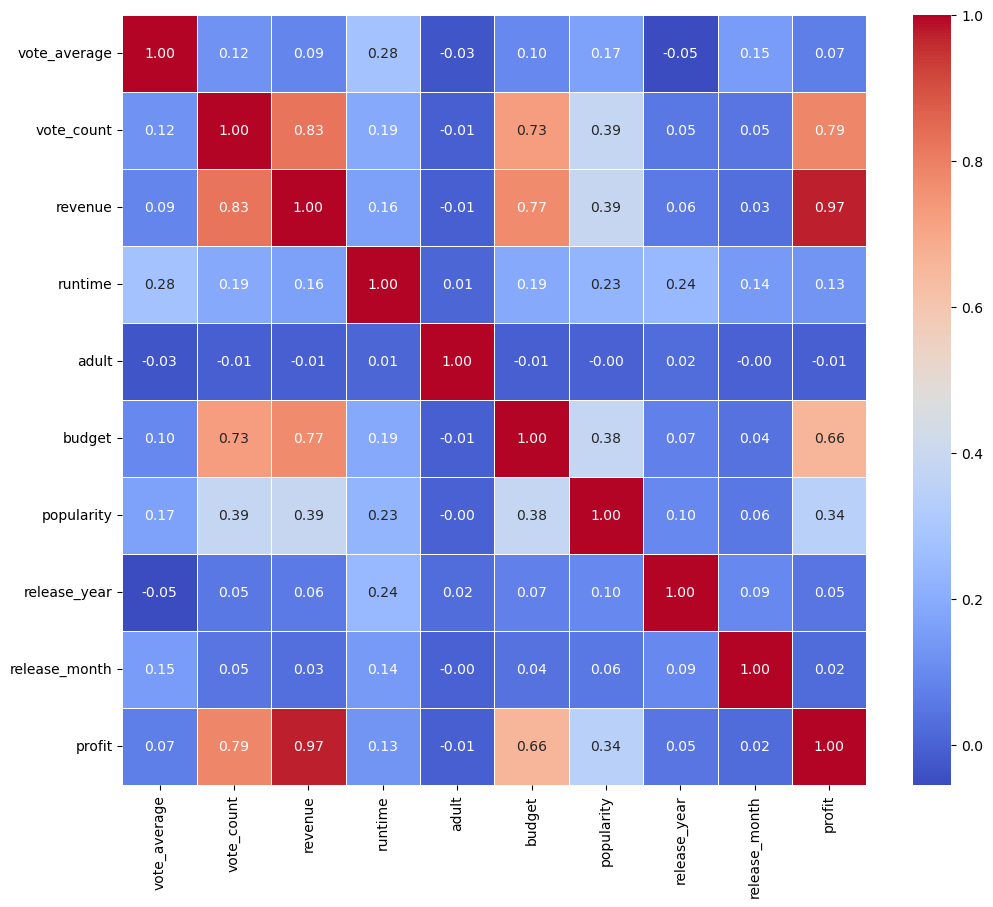

In [5]:
#Select relevant columns. In this case, choose only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

#Correlation Matrix
correlation_matrix = numeric_columns.corr()

#Set up figure with matplotlib
plt.figure(figsize=(12,10))

#Create density plot with Seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

## ML Modeling

### Preparation

In [17]:
#assign our feature and target variable
feature = 'budget'
target = 'revenue'

#drop any rows with missing values

regression_data = df[[feature, target]].dropna()

X = regression_data.iloc[:, :-1].values
y = regression_data.iloc[:, -1].values

#split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [18]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)
y_linear = linearregression.predict(X_test)

### Decision Tree Regression

In [19]:
decisiontreeregression = DecisionTreeRegressor()
decisiontreeregression.fit(X_train, y_train)
y_dectree = decisiontreeregression.predict(X_test)

### Random Forest Regression

In [20]:
randomforestregression = RandomForestRegressor()
randomforestregression.fit(X_train, y_train)
y_randfor = randomforestregression.predict(X_test)

## Model Evaluation

### R-Squared

In [21]:
data1 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", "Random Forest Regressor"],
         "Score" : [r2_score(y_test, y_linear), r2_score(y_test, y_dectree),
                   r2_score(y_test, y_randfor) ]}

score = pd.DataFrame(data1)
print('r_squared metrics')
print(score)

r_squared metrics
      Regression Algorithms     Score
0         Linear Regression  0.576661
1  Decision Tree Regression  0.506194
2   Random Forest Regressor  0.532729


R_squared shows these are not great models. We were looking to choose a model closest to a score of 1.

### Mean Absolute Error

In [22]:
data2 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", "Random Forest Regressor"],
         "Score" : [mean_absolute_error(y_test, y_linear), mean_absolute_error(y_test, y_dectree),
                   mean_absolute_error(y_test, y_randfor) ]}

score = pd.DataFrame(data2)
print('mean absolute error')
print(score)

mean absolute error
      Regression Algorithms         Score
0         Linear Regression  3.206873e+06
1  Decision Tree Regression  3.342756e+06
2   Random Forest Regressor  3.296651e+06


## Feature Engineering

### Polynomial Features

In [23]:
from sklearn.preprocessing import PolynomialFeatures


# Experiment with different degrees
features = ['revenue', 'budget', 'popularity']
target = 'profit'
degrees_to_try = [2, 3, 4]

for degree in degrees_to_try:
    # Feature Engineering - Polynomial Features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Scaling the data
    sc = StandardScaler()
    X_train_poly = sc.fit_transform(X_train_poly)
    X_test_poly = sc.transform(X_test_poly)

    # Linear Regression with Polynomial Features
    linear_regression_poly = LinearRegression()
    linear_regression_poly.fit(X_train_poly, y_train)

    # Predictions
    y_pred_poly = linear_regression_poly.predict(X_test_poly)

    # Evaluate the model
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    # Display the results
    data = {
        "Model": [f"Linear Regression with Polynomial Features (Degree {degree})"],
        "Mean Squared Error": [mse_poly]
    }

    results = pd.DataFrame(data)
    print("Model Performance")
    print(results)

Model Performance
                                               Model  Mean Squared Error
0  Linear Regression with Polynomial Features (De...        7.345389e+14
Model Performance
                                               Model  Mean Squared Error
0  Linear Regression with Polynomial Features (De...        7.360024e+14
Model Performance
                                               Model  Mean Squared Error
0  Linear Regression with Polynomial Features (De...        7.369875e+14


### Interaction Terms

In [15]:
# Drop any rows with missing values
regression_data = df[features + [target]].dropna()

X = regression_data[features]
y = regression_data[target]

# Feature Engineering - Polynomial and Interaction Terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_interaction = poly.fit_transform(X)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_poly_interaction, y, test_size=0.2, random_state=42)

# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression with Polynomial and Interaction Terms
linear_regression_poly = LinearRegression()
linear_regression_poly.fit(X_train, y_train)

# Predictions
y_pred_poly = linear_regression_poly.predict(X_test)

# Evaluate Linear Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest_regressor.predict(X_test)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Display the results
data = {
    "Model": [f"Linear Regression with Polynomial and Interaction Terms (Degree 2)",
              f"Random Forest Regressor with Polynomial and Interaction Terms (Degree 2)"],
    "Mean Squared Error": [mse_poly, mse_rf]
}

results = pd.DataFrame(data)
print("Model Performance")
print(results)


Model Performance
                                               Model  Mean Squared Error
0  Linear Regression with Polynomial and Interact...        4.646882e+13
1  Random Forest Regressor with Polynomial and In...        1.721966e+13
